# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.stats import zscore
# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
#read the CSV file
insurance_df = pd.read_csv("insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Question 2 - Check the distribution of expenses(charges) and state your insights.

In [10]:
insurance_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [11]:
# For the charges column, the difference between mean and median is 3888.38. Also the left tail value is 4641.75
# and right tail value is 7257.87. With the right hand shift in central values and right tail values we can 
# understand the distribution is skewed towards right. This means that there are more outliers with larger "charges values"

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [12]:
insurance_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [13]:
# The corelation between BMI and Age is arround 0.1 which mean they have a week relationship.
# the corelation between BMI and children is 0.012 which is very week relationship.
# The corelation between BMI and Charges is 0.19 which is again a week relationship.

# The corelation between Age and Changes is 0.29 which is a week relationship
# The corelation between Childern and Charges is 0.067 which is a very week relation ship.

# overall there is no Strong or moderate relationship among the variables

# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [14]:
from sklearn.model_selection import train_test_split
X =  insurance_df.drop("charges", axis=1)
y =  insurance_df.pop("charges")
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [15]:
train_set[["CatFemale","CatMale"]] = pd.get_dummies(train_set[("sex")])
train_set[["CatNoSmoke","CatSmoke"]] = pd.get_dummies(train_set[("smoker")])
train_set[["CatNE","CatNW","CatSE","CatSW"]] = pd.get_dummies(train_set[("region")])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [16]:
test_set[["CatFemale","CatMale"]] = pd.get_dummies(test_set[("sex")])
test_set[["CatNoSmoke","CatSmoke"]] = pd.get_dummies(test_set[("smoker")])
test_set[["CatNE","CatNW","CatSE","CatSW"]] = pd.get_dummies(test_set[("region")])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [17]:
train_set = train_set.drop(["sex","smoker","region"],axis=1)
test_set = test_set.drop(["sex","smoker","region"],axis=1)

In [18]:
train_set.head()

,age,bmi,children,CatFemale,CatMale,CatNoSmoke,CatSmoke,CatNE,CatNW,CatSE,CatSW
744,50,26.41,0,0,1,1,0,0,1,0,0
363,21,26.40,1,1,0,1,0,0,0,0,1
10,25,26.22,0,0,1,1,0,1,0,0,0
970,50,28.16,3,1,0,1,0,0,0,1,0
634,51,39.70,1,0,1,1,0,0,0,0,1


In [19]:
test_set.head()

,age,bmi,children,CatFemale,CatMale,CatNoSmoke,CatSmoke,CatNE,CatNW,CatSE,CatSW
559,19,35.53,0,0,1,1,0,0,1,0,0
1087,57,31.54,0,0,1,1,0,0,1,0,0
1020,51,37.00,0,0,1,1,0,0,0,0,1
460,49,36.63,3,1,0,1,0,0,0,1,0
802,21,22.30,1,0,1,1,0,0,0,0,1


# Question 6 - Train your model.

In [20]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(train_set,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [21]:
for idx, col_name in enumerate(train_set.columns):
    print("The coefficient for {} is {}".format(col_name, linear_reg_model.coef_[idx]))

The coefficient for age is 251.68186514630298
The coefficient for bmi is 322.3891068370296
The coefficient for children is 344.9642552960416
The coefficient for CatFemale is 141.39817330439362
The coefficient for CatMale is -141.39817330439547
The coefficient for CatNoSmoke is -12029.695238461698
The coefficient for CatSmoke is 12029.695238461698
The coefficient for CatNE is 527.9051883044182
The coefficient for CatNW is 223.81509065014077
The coefficient for CatSE is -411.4369086013035
The coefficient for CatSW is -340.2833703532544


In [22]:
intercept = linear_reg_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 321.15345829133366


In [23]:
data_train = pd.concat([train_set, train_labels], axis=1)

In [24]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'charges ~ CatFemale+CatMale+bmi+children+CatNoSmoke+CatSmoke+CatNE+CatNW+CatSE+CatSW', data = data_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     271.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):          9.28e-220
Time:                        21:08:03   Log-Likelihood:                -9612.5
No. Observations:                 936   AIC:                         1.924e+04
Df Residuals:                     928   BIC:                         1.928e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3412.6998    555.821      6.140      0.0

# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [25]:
print("Trainning Score",linear_reg_model.score(train_set,train_labels) )

Trainning Score 0.7545557492633161


In [26]:
print("Test Score",linear_reg_model.score(test_set,test_labels) )

Test Score 0.740598931692721


In [27]:
yPredict = linear_reg_model.predict(test_set)
yDiff = yPredict - test_labels
MSE = np.mean(yDiff*yDiff)
print("Mean squared Error of the model is {}",MSE)

Mean squared Error of the model is {} 36761456.35201327


In [28]:
import math
RMSE = math.sqrt(MSE)
print("Root mean squared error of the model is {}",RMSE)

Root mean squared error of the model is {} 6063.122656850451


In [29]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(test_labels,yPredict)
print("Mean absolute error of the model is {}",MAE)

Mean absolute error of the model is {} 4139.932064766013


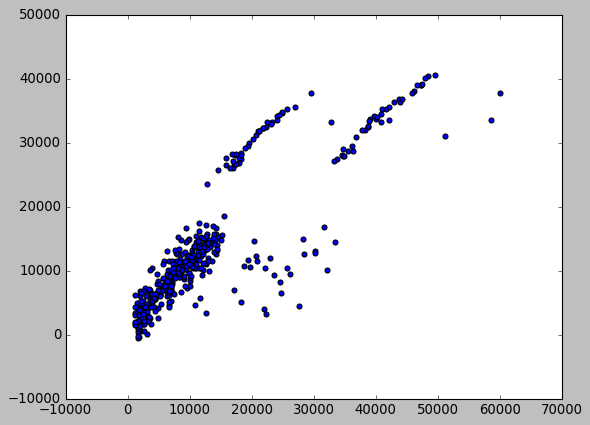

In [30]:
plt.scatter(test_labels, yPredict)

# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [31]:
iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
#Data Slice 
X = iris_df.drop(["class"], axis = 1)
y = iris_df[["class"]]

## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


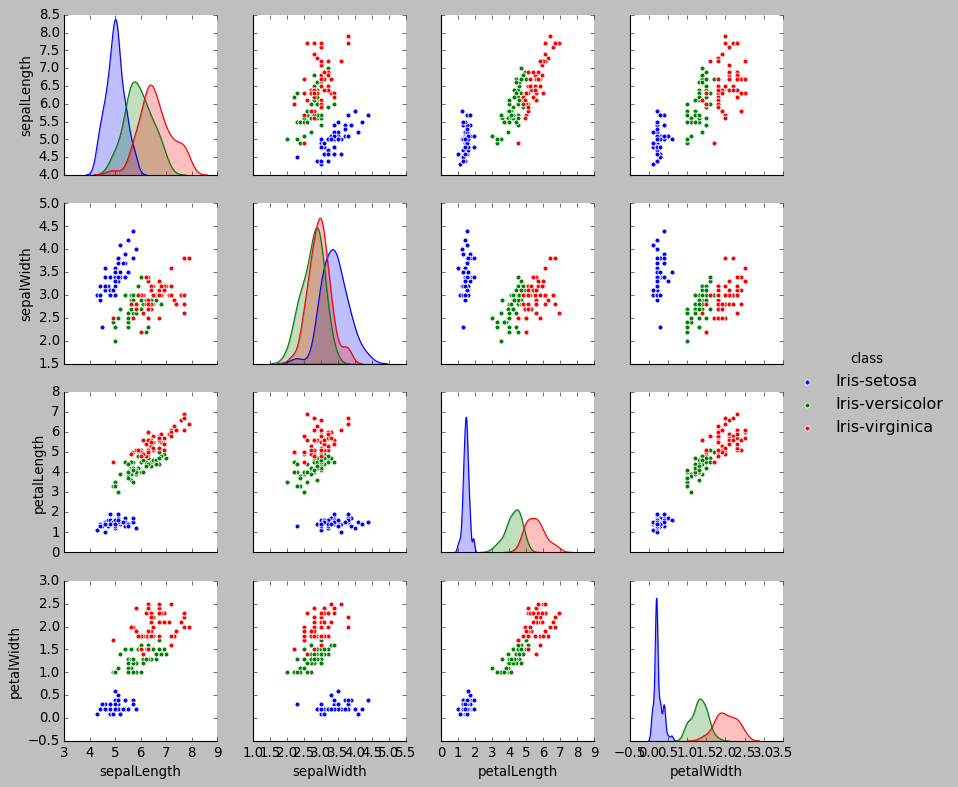

In [33]:
sns.pairplot(iris_df, diag_kind = "kde", hue="class")


In [34]:
# For sepal Width, the gaussians curve has the 'Class' central values overlaping to each other. So sepalWidth has very weak
# corelation with the dependent variable.

#For all other independent variables like sepalLength, petalLength, petalWidth the corelation is strong with dependent variable
# and can be a good predictor of the dependent variable 'Class' 

## Question 11- Do Feature Scaling 

In [35]:
X = X.apply(zscore)
X.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## Question 12- Train and Fit NaiveBayes Model

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [37]:
nv_gnb_model = GaussianNB()

In [38]:
nv_gnb_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

In [39]:
print("Training score {}",nv_gnb_model.score(x_train,y_train))

Training score {} 0.9523809523809523


In [40]:
print("Testing score {}",nv_gnb_model.score(x_test,y_test))

Testing score {} 0.9333333333333333


In [41]:
y_pred = nv_gnb_model.predict(x_test)

In [42]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 12]], dtype=int64)

In [43]:
# as per confusion matrix we understand that model has correctly predicted all the Iris-setosa as Iris-setosa. 
# It has correcly identified 16 Iris-versicolor as Iris-versicolor, but has wrongly predicted 2 Iris-versicolor as Iris-virginica
# It has correcly identified 12 Iris-virginica as Iris-virginica, but has wrongly predicted 1 Iris-virginica as Iris-versicolor

# Ensemble Methods

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [44]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
print("Training data score {}".format(rf_classifier.score(x_train,y_train)))

Training data score 0.9904761904761905


In [46]:
print("Test data score {}".format(rf_classifier.score(x_test,y_test)))

Test data score 0.9555555555555556


In [47]:
y_pred = rf_classifier.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [48]:
# From the confusion matrix, the predication of class Iris-versicolor has increased.

## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [49]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [50]:
print("Training data score {}".format(gb_classifier.score(x_train,y_train)))

Training data score 1.0


In [51]:
print("Test data score {}".format(gb_classifier.score(x_test,y_test)))

Test data score 0.9555555555555556


In [52]:
y_pred = gb_classifier.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [53]:
# from the confusion matrix, there is no significant change from the RF model. 
# There as been a change in class Iris-versicolor prediction